### Forecating 'HVAC System: Electricity'

In [182]:
# Imports
import pandas as pd 
import numpy as np          
import matplotlib.pyplot as plt  
from datetime import datetime    
from pandas import Series        
import warnings                  
warnings.filterwarnings("ignore")
from statsmodels.tsa.holtwinters import Holt

In [183]:
# Loading "RTU.csv" as a Data Frame
df = pd.read_csv('RTU.csv', parse_dates=['Timestamp'])

In [184]:
# Checking the Top 5 observations in the Data
df.head()

,Timestamp,RTU: Supply Air Temperature,RTU: Return Air Temperature,RTU: Supply Air Fan Status,RTU: Circuit 1 Discharge Temperature,RTU: Circuit 1 Condenser Outlet Temperature,RTU: Circuit 1 Suction Temperature,RTU: Circuit 2 Discharge Temperature,RTU: Circuit 2 Condenser Outlet Temperature,RTU: Circuit 2 Suction Temperature,...,VAV Box: Room 103 Air Temperature,VAV Box: Room 104 Air Temperature,VAV Box: Room 105 Air Temperature,VAV Box: Room 106 Air Temperature,VAV Box: Room 202 Air Temperature,VAV Box: Room 203 Air Temperature,VAV Box: Room 204 Air Temperature,VAV Box: Room 205 Air Temperature,VAV Box: Room 206 Air Temperature,Fault Detection Ground Truth
0,2017-08-27 00:00:00,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2017-08-27 00:01:00,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2017-08-27 00:02:00,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2017-08-27 00:03:00,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2017-08-27 00:04:00,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [185]:
# Checking the Variable to be forecasted
df['HVAC System: Electricity']

0        3.50865
1        3.70485
2        3.54327
3        3.42785
4        3.47402
          ...   
30235    3.85490
30236    3.58944
30237    3.49710
30238    3.88953
30239    3.58944
Name: HVAC System: Electricity, Length: 30240, dtype: float64

In [186]:
# Descriptive Statistics about 'HVAC System: Electricity'
df['HVAC System: Electricity'].describe()

count    30240.000000
mean       188.514477
std        160.866347
min          3.370140
25%          3.785650
50%        192.028240
75%        312.662247
max        618.475090
Name: HVAC System: Electricity, dtype: float64

In [187]:
ser = df
ser1 = ser[['HVAC System: Electricity','RTU: Supply Air Temperature']]
ser1 = ser1.set_index(ser['Timestamp'])
ser1 = ser1[['HVAC System: Electricity']]
ser2 = ser1['2018-01':]

In [188]:
# Splitting into Train, validation and testing set
ser = df[['Timestamp', 'HVAC System: Electricity']]
#len(ser)*(20/100)
train = ser[:-6048]
test1 = ser[-6048:]
train_original=train.copy()
test_original=test1.copy()
Train = train.iloc[:19400]
valid = train.iloc[19400:]
test = test1[['Timestamp']]

In [189]:
# Checking shape of the Training and Testing sets
train.shape, test.shape

((24192, 2), (6048, 1))

In [190]:
# Changing the format of the Timestamp
train['Datetime'] = pd.to_datetime(train.Timestamp,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Timestamp,format='%d-%m-%Y %H:%M') 
test_original['Datetime'] = pd.to_datetime(test_original.Timestamp,format='%d-%m-%Y %H:%M') 
train_original['Datetime'] = pd.to_datetime(train_original.Timestamp,format='%d-%m-%Y %H:%M')

In [191]:
# Extracting features from Timestamp
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day    
    i['Hour']=i.Datetime.dt.hour

In [192]:
# Separating Weekdays and weekend
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

temp2 = train['Datetime'].apply(applyer) 
train['weekend']=temp2

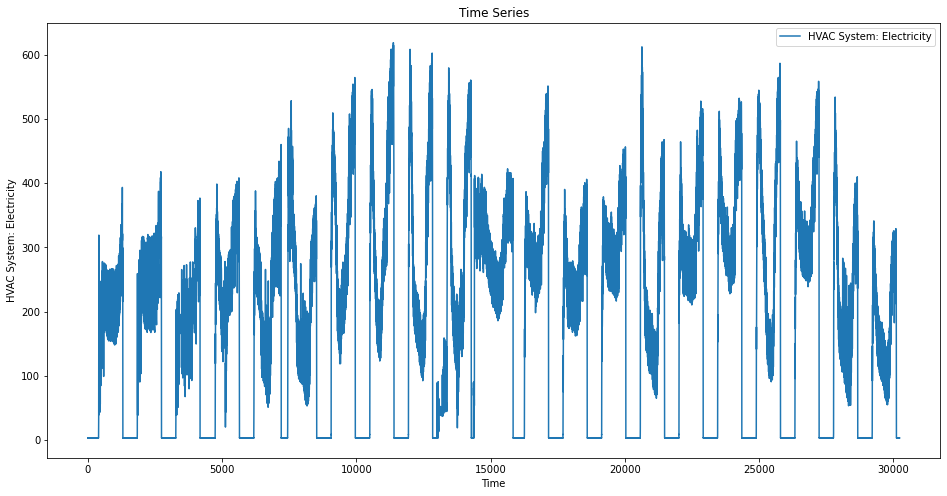

In [193]:
# Plotting 'HVAC System: Electricity'
train.index = train['Datetime'] 
ts = df['HVAC System: Electricity'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='HVAC System: Electricity') 
plt.title('Time Series') 
plt.xlabel("Time")
plt.ylabel("HVAC System: Electricity") 
plt.legend(loc='best')

### Simple Data Exploration

<AxesSubplot:xlabel='year'>

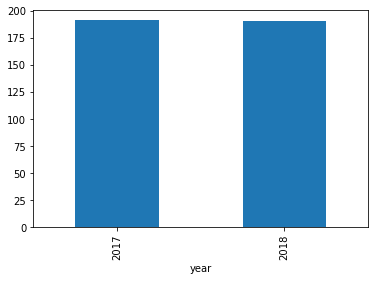

In [194]:
# Consumption by 'Year'
train.groupby('year')['HVAC System: Electricity'].mean().plot.bar()

<AxesSubplot:xlabel='month'>

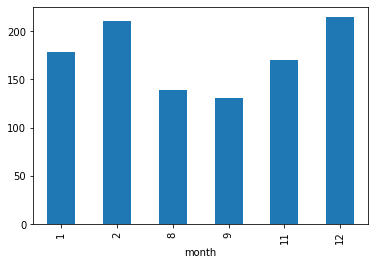

In [195]:
# Consumption by 'Month'
train.groupby('month')['HVAC System: Electricity'].mean().plot.bar()

<AxesSubplot:title={'center':'Month-wise Electricity Consumption'}, xlabel='year,month'>

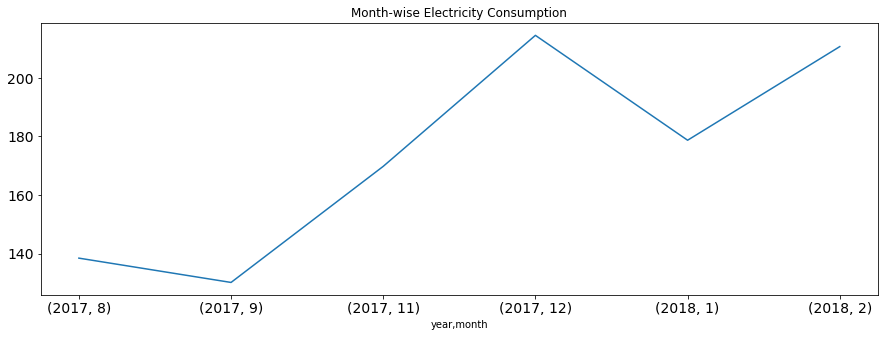

In [196]:
# Consumption by 'Month' - line plot
temp=train.groupby(['year', 'month'])['HVAC System: Electricity'].mean() 
temp.plot(figsize=(15,5), title= 'Month-wise Electricity Consumption', fontsize=14)

<AxesSubplot:xlabel='day'>

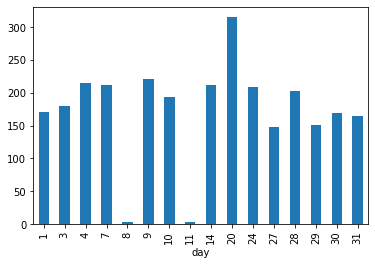

In [197]:
# Consumption by day of month
train.groupby('day')['HVAC System: Electricity'].mean().plot.bar()

In [198]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
hourly = train.resample('H').mean() 
daily = train.resample('D').mean() 
weekly = train.resample('W').mean() 
monthly = train.resample('M').mean()

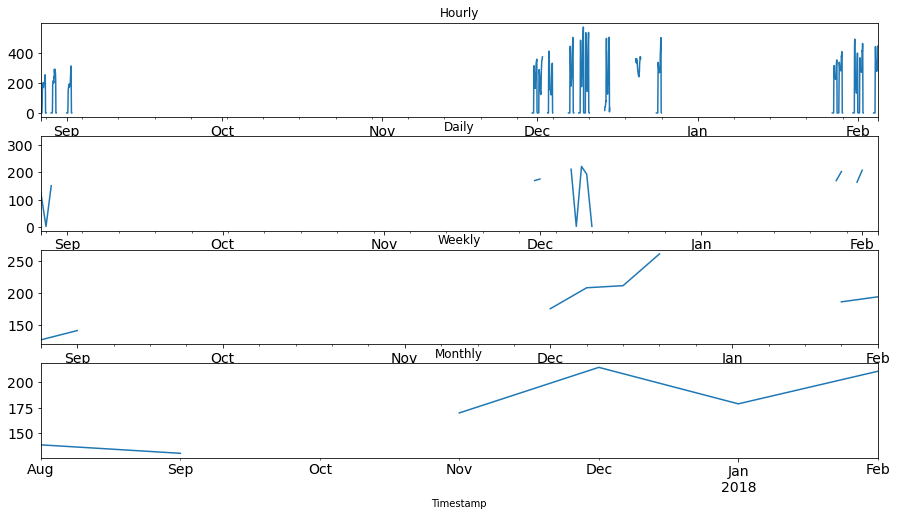

In [199]:
fig, axs = plt.subplots(4,1) 
hourly['HVAC System: Electricity'].plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily['HVAC System: Electricity'].plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly['HVAC System: Electricity'].plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2]) 
monthly['HVAC System: Electricity'].plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 
plt.show()

In [200]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 
test = test.resample('D').mean() 
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index = train.Timestamp  
train = train.resample('D').mean()

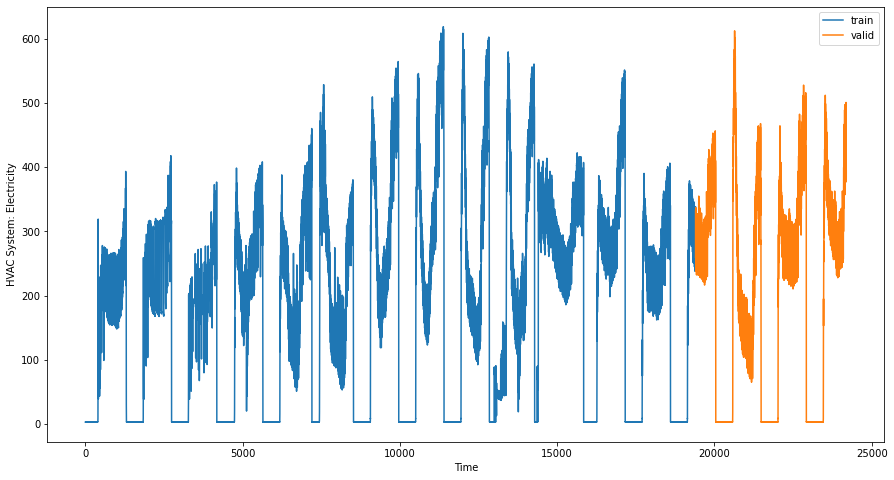

In [201]:
# Plotting Training and Valiadtion Sets
Train['HVAC System: Electricity'].plot(figsize=(15,8),label='train') 
valid['HVAC System: Electricity'].plot(figsize=(15,8),label='valid') 
plt.xlabel("Time") 
plt.ylabel('HVAC System: Electricity') 
plt.legend(loc='best') 
plt.show()

### Decomposition of Time Series

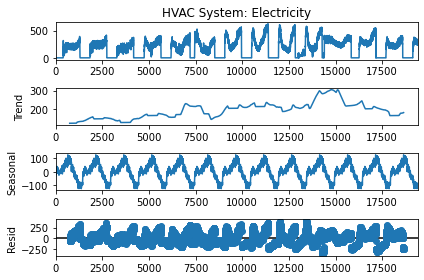

In [202]:
import statsmodels.api as sm 
sm.tsa.seasonal_decompose(Train['HVAC System: Electricity'], period = 1500).plot() 
plt.show()

## Forecasting
#### Holt’s Linear Trend Model

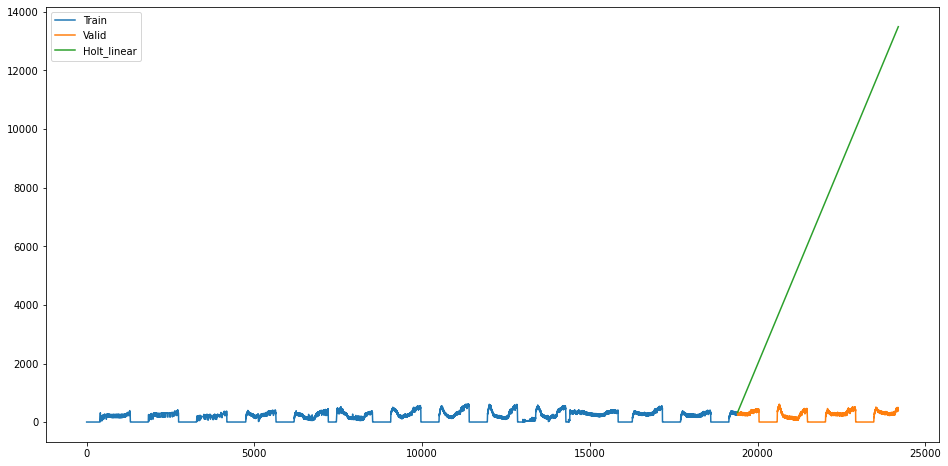

In [203]:
y_hat_avg = valid.copy() 
fit1 = Holt(np.asarray(Train['HVAC System: Electricity'])).fit(smoothing_level = 0.3,
        smoothing_slope = 0.1) 
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8))
plt.plot(Train['HVAC System: Electricity'], label='Train')
plt.plot(valid['HVAC System: Electricity'], label='Valid') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

#### Exponential Smoothing Method

In [204]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
y_hat_avg = valid.copy() 
fit2 = SimpleExpSmoothing(np.asarray(Train['HVAC System: Electricity'])).fit(smoothing_level=0.6,optimized=False) 
y_hat_avg['SES'] = fit2.forecast(len(valid))

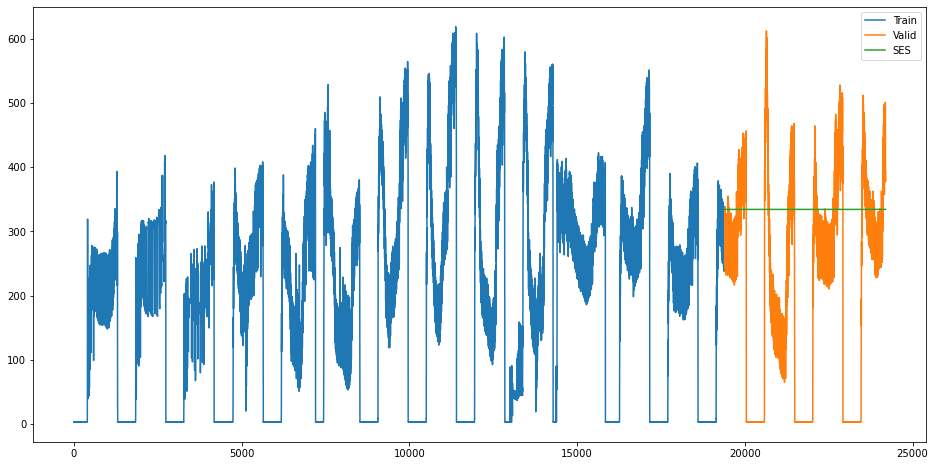

In [205]:
plt.figure(figsize=(16,8))  
plt.plot(Train['HVAC System: Electricity'], label='Train') 
plt.plot(valid['HVAC System: Electricity'], label='Valid') 
plt.plot(y_hat_avg['SES'], label='SES') 
plt.legend(loc='best') 
plt.show()

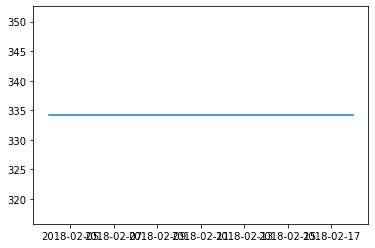

In [206]:
test['SES'] = fit2.forecast(len(test))
plt.plot(test['SES'])